In [1]:
%matplotlib inline

import numpy as np 
import pandas as pd 
import os
import pydicom
import matplotlib.pyplot as plt
import assd_func as af

# 1. Load patient data

In [2]:
#patient1 - Subject 9
contour_path1="C:/Users/lykha/OneDrive/Documents/Medical-imaging-Research/Data/Prostate Cases/9/rtstruct/rtss.dcm"
img_path1="C:/Users/lykha/OneDrive/Documents/Medical-imaging-Research/Data/Prostate Cases/9/ct"
contour1=pydicom.read_file(contour_path1)
contours1=af.read_structure(contour1)
slices1 = [pydicom.read_file(img_path1 + '/' + s) for s in os.listdir(img_path1)]
image1 = np.stack([s.pixel_array for s in slices1], axis=-1)
label1, colors1 = af.get_mask(contours1, slices1, image1)

In [3]:
#patient2 - Subject 3
contour_path2="C:/Users/lykha/OneDrive/Documents/Medical-imaging-Research/Data/Prostate Cases/3/rtstruct/rtss.dcm"
img_path2="C:/Users/lykha/OneDrive/Documents/Medical-imaging-Research/Data/Prostate Cases/3/ct"
#read img and contour
contour2=pydicom.read_file(contour_path2)
contours2= af.read_structure(contour2)
slices2 = [pydicom.read_file(img_path2 + '/' + s) for s in os.listdir(img_path2)]
image2 = np.stack([s.pixel_array for s in slices2], axis=-1)
label2, colors2 = af.get_mask(contours2, slices2, image2)

In [4]:
#patient2 - Subject 1
contour_path3="C:/Users/lykha/OneDrive/Documents/Medical-imaging-Research/Data/Prostate Cases/1/rtstruct/rtss.dcm"
img_path3="C:/Users/lykha/OneDrive/Documents/Medical-imaging-Research/Data/Prostate Cases/1/ct"
#read img and contour
contour3=pydicom.read_file(contour_path3)
contours3=af.read_structure(contour3)
slices3 = [pydicom.read_file(img_path3 + '/' + s) for s in os.listdir(img_path3)]
image3 = np.stack([s.pixel_array for s in slices3], axis=-1)
label3, colors3 = af.get_mask(contours3, slices3, image3)

# 2. Graph of HU and original contour

## Patient 1 (Subject 9)

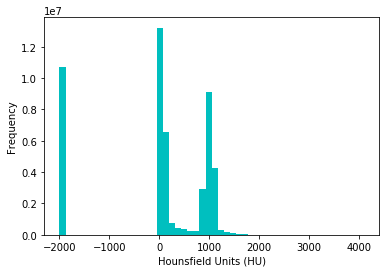

Slice Thickness: 2.500000
Pixel Spacing (row, col): (0.976562, 0.976562) 


In [5]:
#patient1
plt.hist(image1.flatten(), bins=50, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()
print("Slice Thickness: %f" % slices1[0].SliceThickness)
print("Pixel Spacing (row, col): (%f, %f) " % (slices1[0].PixelSpacing[0], slices1[0].PixelSpacing[1]))

C:\Users\lykha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


(-0.5, 511.5, 511.5, -0.5)

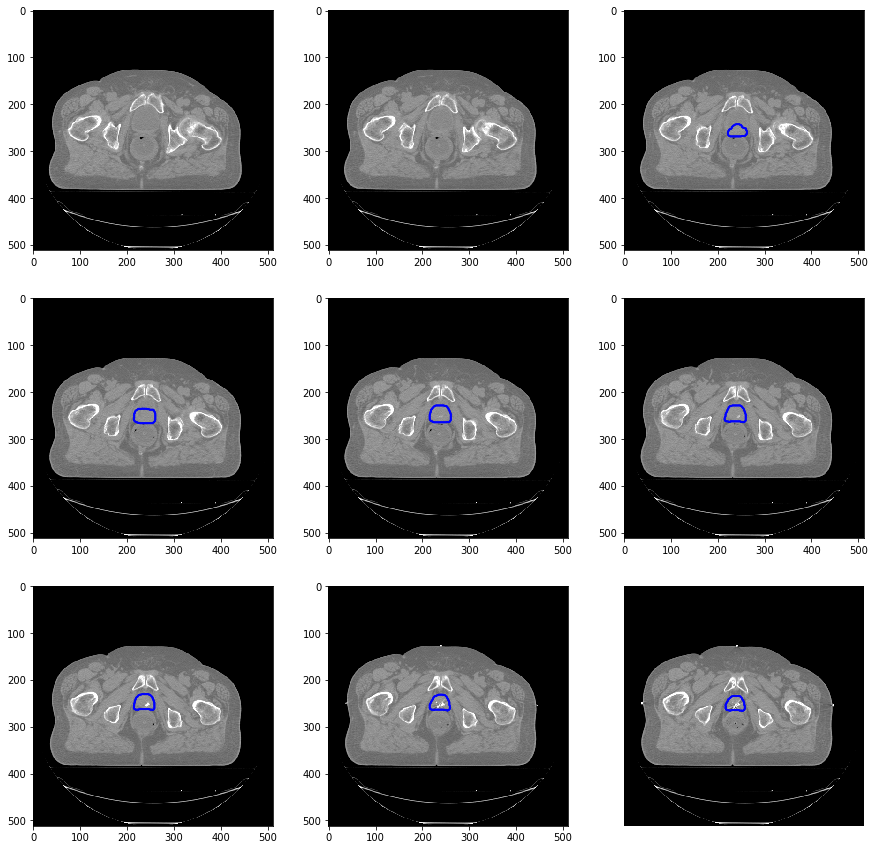

In [6]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image1[..., i + 15 ], cmap="gray", vmin=500, vmax=1500)
    plt.contour(label1[..., i + 15 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

## Patient 2 (Subject 3)

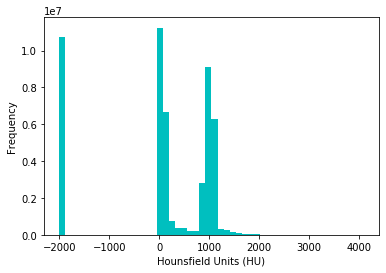

Slice Thickness: 2.500000
Pixel Spacing (row, col): (0.976562, 0.976562) 


In [7]:
#patient2
plt.hist(image2.flatten(), bins=50, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()
print("Slice Thickness: %f" % slices2[0].SliceThickness)
print("Pixel Spacing (row, col): (%f, %f) " % (slices2[0].PixelSpacing[0], slices2[0].PixelSpacing[1]))

(-0.5, 511.5, 511.5, -0.5)

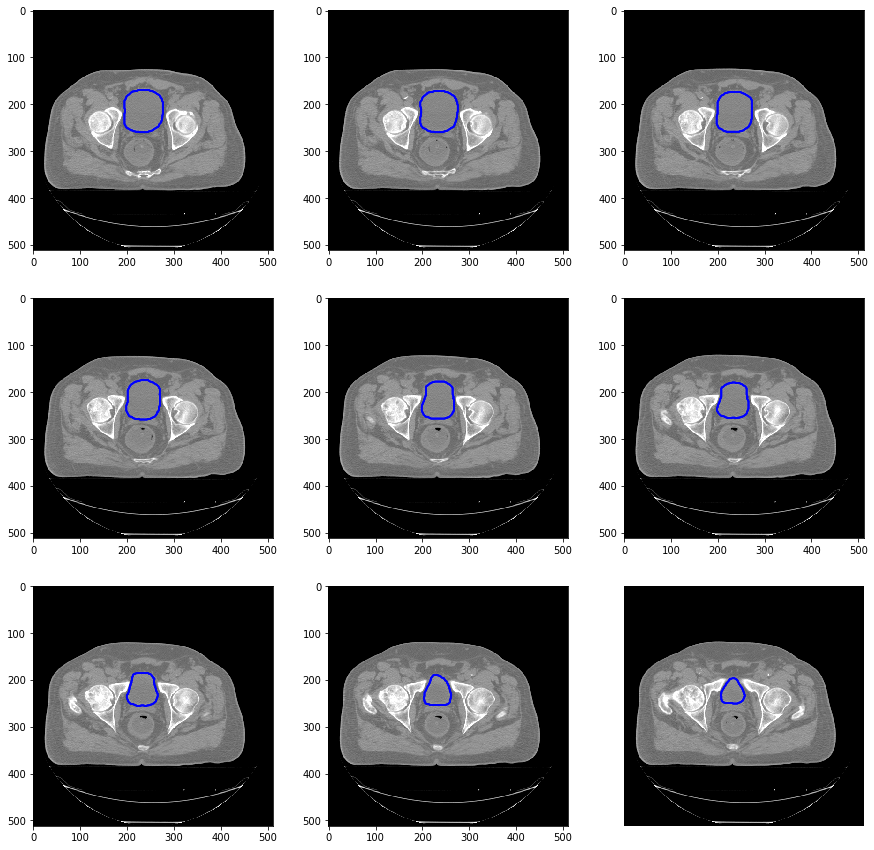

In [8]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image2[..., i + 180 ], cmap="gray", vmin=500, vmax=1500)
    plt.contour(label2[..., i + 180 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

## Patient 3 (Subject 1)

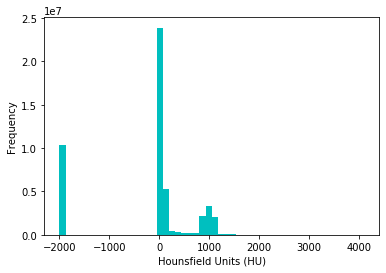

Slice Thickness: 2.500000
Pixel Spacing (row, col): (1.269531, 1.269531) 


In [9]:
#patient3
plt.hist(image3.flatten(), bins=50, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()
print("Slice Thickness: %f" % slices1[0].SliceThickness)
print("Pixel Spacing (row, col): (%f, %f) " % (slices3[0].PixelSpacing[0], slices3[0].PixelSpacing[1]))

(-0.5, 511.5, 511.5, -0.5)

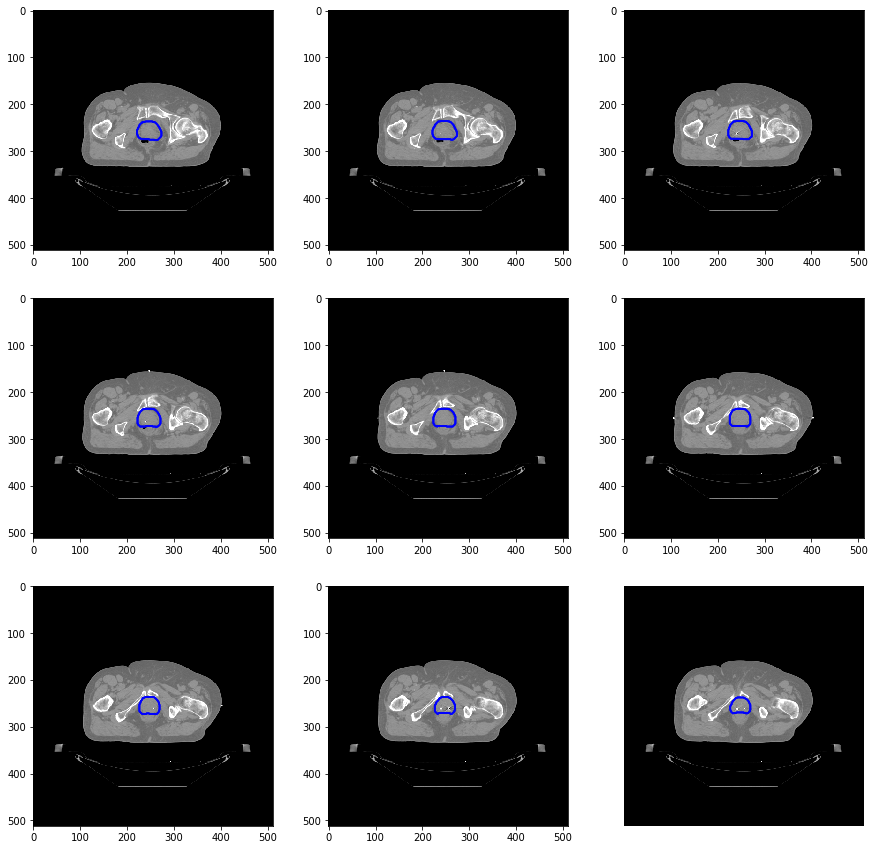

In [10]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image3[..., i + 15 ], cmap="gray", vmin=500, vmax=1500)
    plt.contour(label3[..., i + 15 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [11]:
# choose target img for patient1
target_img1 = image1[..., 19]
target_label1 = label1[..., 19]
mask1 = np.where(target_label1!=0,4,0)
surface1, interior1 = af.make_surface_contour(mask1)
surface_cord1 = np.argwhere(surface1 != 0).tolist()

In [12]:
# choose target img for patient2
target_img2 = image2[..., 185]
target_label2 = label2[..., 185]
mask2 = np.where(target_label2!=0,4,0)
surface2, interior2 = af.make_surface_contour(mask2)
surface_cord2 = np.argwhere(surface2 != 0).tolist()

In [13]:
# choose target img for patient3
target_img3 = image3[..., 16]
target_label3 = label3[..., 16]
mask3 = np.where(target_label3!=0,4,0)
surface3, interior3 = af.make_surface_contour(mask3)
surface_cord3 = np.argwhere(surface3 != 0).tolist()

# 3. Different iterations of the same set of paramenters on the same slice

After picking the target images and subjects, we ran different parameter experimentation of ASSD algorithm on the images. A detailed report of this experimentation can be found at:. Eventually, we resulted in a set of parameters that create the most desirable DU contouring. The set of parameters is:

-*SD = 5x[1.7, 2, 2.5] for variation in the contour*

-*k nearest neighbors = 45 fro smoothing of the contour*

-*R/6 in the truncated gaussian function*
    

(300.0, 190.0, 300.0, 190.0)

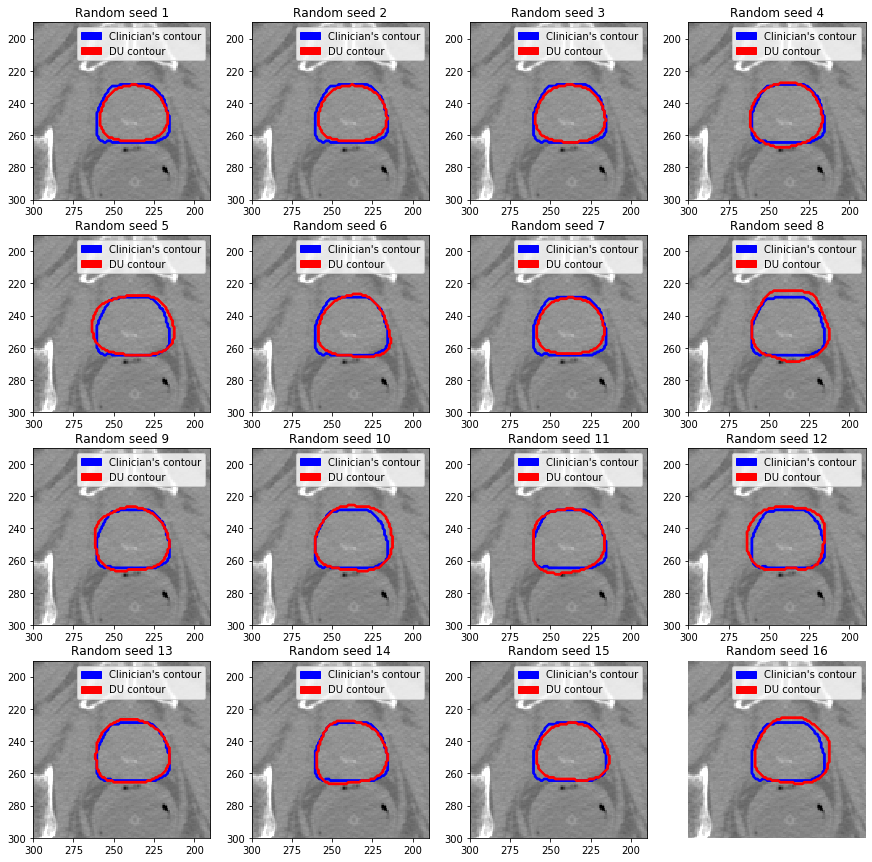

In [49]:
#patient1
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
red_patch = mpatches.Patch(color='red', label='DU contour')

a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])

plt.figure(figsize=(15, 15))

du_1_l = []
for i in range(16):
    c = 5
    SD=[c*1.7, c*2, c*2.5]
    dx, dy, mask1, t, L  = af.assd(target_img1, target_label1, voxelsize, a, SD, circles=3, seed=123, k=45, w=6, smooth=True, blur=True, ismax=True)
    du1 = af.plotting_assd(dx, dy, mask1, target_img1, quiver=False, plot=False)
    du1 = np.where(du1 < 0.5, 0, 4)
    du_1_l.append(du1)
    plt.subplot(4, 4, i + 1)
    plt.imshow(target_img1, cmap="gray", vmin=500, vmax=1500)
    #plt.title("k = " + str(K[i]))
    plt.contour(mask1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.contour(du1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.xlim(300, 190)
    plt.ylim(300, 190)
    plt.title("Random seed " + str(i+1))
    plt.legend(handles=[ blue_patch, red_patch])
plt.axis('off')

In this plot, we show different iterations of the chosen set of paramters on the the same slice. We can see that the DU contouring results seem very consistent throughout all 16 iterations. Therefore, this set of parameters are chosen as the standard set to be applied on other use use cases in next sections. 

# 4. Different subjects:

## Patient 1 (Subject 9)

In [91]:
du_1 = du_1_l[4]
du_2 = du_2_l[10]
du_3 = du_3_l[4]

In [50]:
# roi = target_label*target_img
a=50
#voxelsize = np.array([0.488281, 0.488281, 1.25])
voxelsize = np.array([0.976562, 0.976562, 2.5])
c = 5
SD=[c*1.7, c*2, c*2.5]
w = 6
k = 45
circles = 3
dx, dy, mask, t, L = af.assd(target_img1, target_label1, voxelsize, a, SD, circles, seed=123, k, w, smooth=True, blur=True, ismax=True)
du_1 = af.plotting_assd(dx, dy, mask, target_img1, quiver=False, plot=False, display=False)
du_1 = np.where(du_1 < 0.5, 0, 4)

## Patient 2 (Subject 3)

In [70]:
# roi = target_label*target_img
dx, dy, mask, t, L = af.assd(target_img2, target_label2, voxelsize, a, SD, circles, seed=123, k, w, smooth=True, blur=True, ismax=True)
du_2 = af.plotting_assd(dx, dy, mask, target_img2, quiver=False, plot=False, display=False)
du_2 = np.where(du_2 < 0.5, 0, 4)

## Patient 3 (Subject 1)

In [71]:
dx, dy, mask, t, L = af.assd(target_img3, target_label3, voxelsize, a, SD, circles, seed=123, k, w, smooth=True, blur=True, ismax=True)
du_3 = af.plotting_assd(dx, dy, mask, target_img3, quiver=False, plot=False, display=False)
du_3 = np.where(du_3 < 0.5, 0, 4)

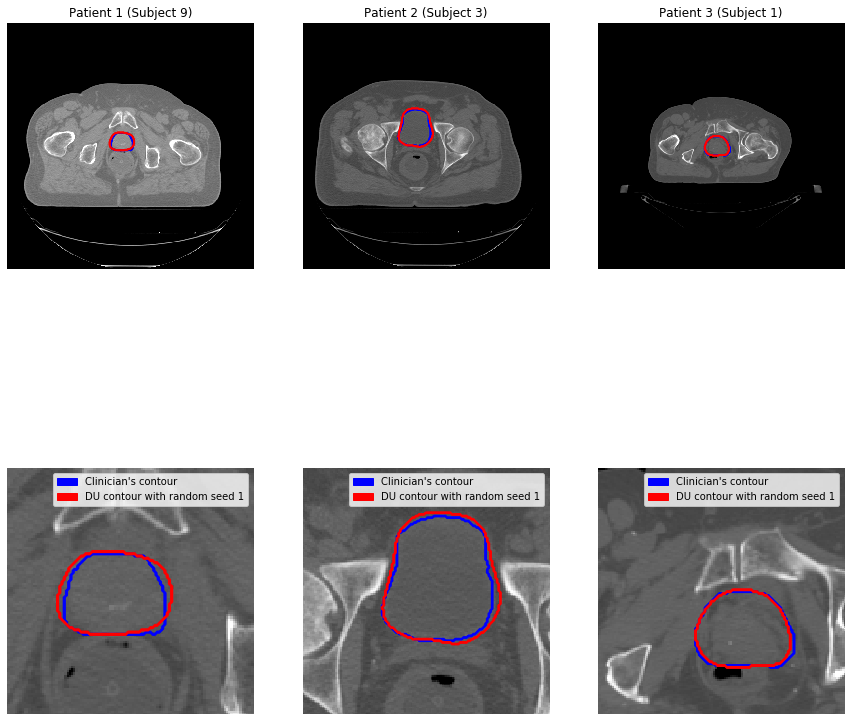

In [92]:
fig, ax = plt.subplots(2, 3, figsize=[15, 15])

ax[0, 0].set_title("Patient 1 (Subject 9)")
ax[0, 0].imshow(target_img1, cmap='gray', vmin=500, vmax=1500)
ax[0, 0].contour(target_label1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[0, 0].contour(du_1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[0, 0].set_xlabel("Orginal contour")
ax[0, 0].axis('off')

ax[0, 1].set_title("Patient 2 (Subject 3)")
ax[0, 1].imshow(target_img2, cmap='gray', vmin=500, vmax=2000)
ax[0, 1].contour(target_label2, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[0, 1].contour(du_2, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[0, 1].set_xlabel("Orginal contour")
ax[0, 1].axis('off')

ax[0, 2].set_title("Patient 3 (Subject 1)")
ax[0, 2].imshow(target_img3, cmap='gray', vmin=500, vmax=2000)
ax[0, 2].contour(target_label3, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[0, 2].contour(du_3, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[0, 2].set_xlabel("Orginal contour")
ax[0, 2].axis('off')

#ax[1, 0].set_title("Tranverse (Horizonatal) slice")
ax[1, 0].imshow(target_img1, cmap='gray', vmin=500, vmax=2000)
ax[1, 0].contour(target_label1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[1, 0].contour(du_1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[1, 0].set_xlabel("DU contour")
ax[1, 0].set_xlim(190, 300)
ax[1, 0].set_ylim(300, 190)
ax[1, 0].legend(handles=[ blue_patch, red_patch])
ax[1, 0].axis('off')

#ax[1, 1].set_title("Frontal (Coronal) slice")
ax[1, 1].imshow(target_img2, cmap='gray', vmin=500, vmax=2000)
ax[1, 1].contour(target_label2, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[1, 1].contour(du_2, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[1, 1].set_xlabel("DU contour")
ax[1, 1].set_xlim(150, 300)
ax[1, 1].set_ylim(300, 150)
ax[1, 1].legend(handles=[ blue_patch, red_patch])
ax[1, 1].axis('off')

#ax[1, 2].set_title("Sagittal (Longitudinal) slice")
ax[1, 2].imshow(target_img3, cmap='gray', vmin=500, vmax=2000)
ax[1, 2].contour(target_label3, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[1, 2].contour(du_3, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[1, 2].set_xlabel("DU contour")
ax[1, 2].set_xlim(170, 300)
ax[1, 2].set_ylim(300, 170)
ax[1, 2].legend(handles=[ blue_patch, red_patch])
ax[1, 2].axis('off')

plt.show()

*-> Based on the above plots, we can see that the algorithm works fine on different subjects.*

# 5. Different view on patient 3

**Frontal (Coronal) slice**

In [84]:
frontal_target_img = image3[250, 0:512, 0:100]
frontal_target_label = label3[250, 0:512, 0:100]

In [111]:
dx, dy, mask, t, L = af.assd(frontal_target_img, frontal_target_label, voxelsize, a, SD, circles, seed=123, k, w, smooth=True, blur=True, ismax=True)
frontal_du = af.plotting_assd(dx, dy, mask, frontal_target_img, quiver=False, plot=False, display=False)
frontal_du = np.where(frontal_du < 0.5, 0, 4)

**Sagittal slice**

In [75]:
sagittal_target_img = image3[0:512, 260, 0:90]
sagittal_target_label = label3[0:512, 260, 0:90]

In [124]:
dx, dy, mask, t, L = af.assd(sagittal_target_img, sagittal_target_label, voxelsize, a, SD, circles, seed=123, k, w, smooth=True, blur=True, ismax=True)
sagittal_du = af.plotting_assd(dx, dy, mask, sagittal_target_img, quiver=False, plot=False, display=False)
sagittal_du = np.where(sagittal_du < 0.5, 0, 4)

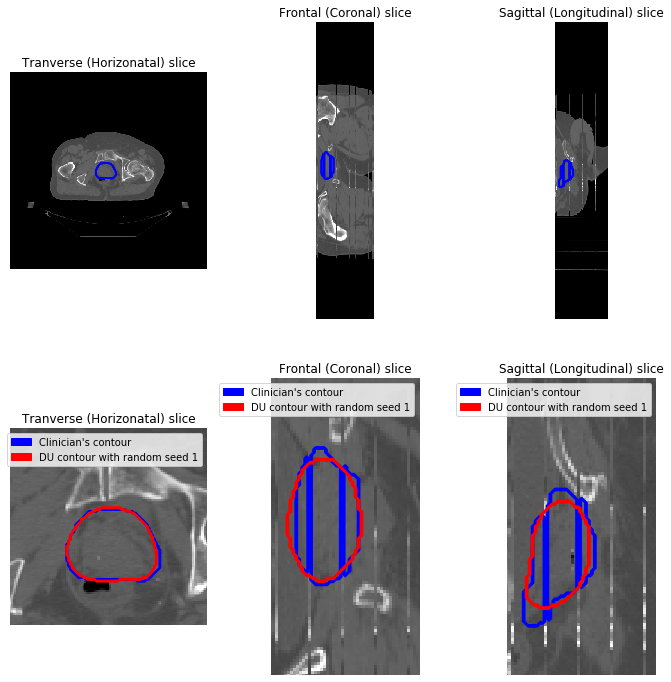

In [125]:
blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")

fig, ax = plt.subplots(2, 3, figsize=[12, 12])

ax[0, 0].set_title("Tranverse (Horizonatal) slice")
ax[0, 0].imshow(target_img3, cmap='gray', vmin=500, vmax=2000)
ax[0, 0].contour(target_label3, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[0, 0].set_xlabel("Orginal contour")
ax[0, 0].axis('off')

ax[0, 1].set_title("Frontal (Coronal) slice")
ax[0, 1].imshow(frontal_target_img, cmap='gray', vmin=500, vmax=2000)
ax[0, 1].contour(frontal_target_label, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[0, 1].set_xlabel("Orginal contour")
ax[0, 1].axis('off')

ax[0, 2].set_title("Sagittal (Longitudinal) slice")
ax[0, 2].imshow(sagittal_target_img, cmap='gray', vmin=500, vmax=2000)
ax[0, 2].contour(sagittal_target_label, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[0, 2].set_xlabel("Orginal contour")
ax[0, 2].axis('off')

ax[1, 0].set_title("Tranverse (Horizonatal) slice")
ax[1, 0].imshow(target_img3, cmap='gray', vmin=500, vmax=2000)
ax[1, 0].contour(target_label3, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[1, 0].contour(du_3, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[1, 0].set_xlabel("DU contour")
ax[1, 0].set_xlim(190, 300)
ax[1, 0].set_ylim(300, 190)
ax[1, 0].legend(handles=[ blue_patch, red_patch])
ax[1, 0].axis('off')

ax[1, 1].set_title("Frontal (Coronal) slice")
ax[1, 1].imshow(frontal_target_img, cmap='gray', vmin=500, vmax=2000)
ax[1, 1].contour(frontal_target_label, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[1, 1].contour(frontal_du, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[1, 1].set_xlabel("DU contour")
ax[1, 1].set_xlim(0, 50)
ax[1, 1].set_ylim(300, 200)
ax[1, 1].legend(handles=[ blue_patch, red_patch])
ax[1, 1].axis('off')

ax[1, 2].set_title("Sagittal (Longitudinal) slice")
ax[1, 2].imshow(sagittal_target_img, cmap='gray', vmin=500, vmax=2000)
ax[1, 2].contour(sagittal_target_label, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[1, 2].contour(sagittal_du, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[1, 2].set_xlabel("DU contour")
ax[1, 2].set_xlim(0, 50)
ax[1, 2].set_ylim(300, 200)
ax[1, 2].legend(handles=[ blue_patch, red_patch])
ax[1, 2].axis('off')

plt.show()

*-> Based on the above plots, we can see that the algorithm works fine on different views.*

# 4. Different slices of the same patient (Patient 1)

In [130]:
assd_contour = []

for i in range(12):
    if i != 7:
        dx, dy, mask, t, L  = af.assd(image1[..., i + 17], label1[..., i + 17], voxelsize, a, SD, circles=3, seed=123, k=k, w=w, smooth=True, blur=True, ismax=True)
        du = af.plotting_assd(dx, dy, mask, target_img1, quiver=False, plot=False)
        du_2 = np.where(du < 0.5, 0, 4)
        mask = np.where(du_2 != 0, 4, 0)
    
    elif i == 7:
        du_2 = label1[..., i + 17]
    assd_contour.append(list(du_2)) #surface
assd_contour = np.array(assd_contour).transpose(1, 2, 0)
label_cpy = label1.copy()
label_cpy[..., 17:29] = assd_contour
assd_contour = label_cpy

In [79]:
assd_contour_2 = []

for i in range(12):
    if i != 7:
        dx, dy, mask, t, L  = af.assd(image1[..., i + 17], label1[..., i + 17], voxelsize, a, SD, circles=3, seed=123,k=k, w=w, smooth=True, blur=True, ismax=True)
        du = af.plotting_assd(dx, dy, mask, target_img1, quiver=False, plot=False)
        du_2 = np.where(du < 0.5, 0, 4)
        mask = np.where(du_2 != 0, 4, 0)
    
    elif i == 7:
        du_2 = label1[..., i + 17]
    assd_contour_2.append(list(du_2)) #surface
assd_contour_2 = np.array(assd_contour_2).transpose(1, 2, 0)
label_cpy = label1.copy()
label_cpy[..., 17:29] = assd_contour_2
assd_contour_2 = label_cpy

In [131]:
assd_contour[..., 24] = assd_contour[..., 23]
label1[..., 24] = label1[..., 23]
image1[..., 24] = image1[..., 23] 
assd_contour_2[..., 24] = assd_contour_2[..., 23]


## Plot of clinician's contour vs. multiple DU contours from different random seeds 

(280.0, 200.0, 280.0, 200.0)

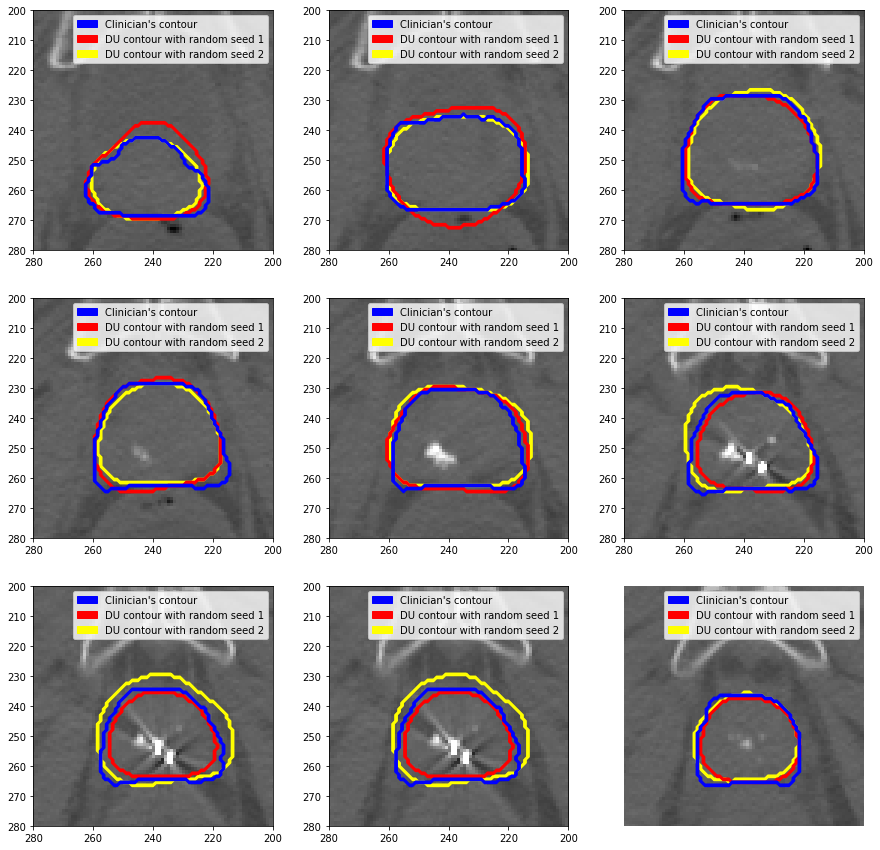

In [132]:
import matplotlib.patches as mpatches

plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image1[..., i  + 17 ], cmap="gray", vmin=500, vmax=2000)
    plt.contour(assd_contour_2[...,i + 17 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="yellow")
    plt.contour(assd_contour[...,i + 17 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(label1[..., i + 17 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(280, 200)
    plt.ylim(280, 200)
    blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    yellow_patch = mpatches.Patch(color='yellow', label='DU contour with random seed 2')
    plt.legend(handles=[ blue_patch, red_patch, yellow_patch])
    
plt.axis('off')

This may be hard to see so we plotted them separately for further analysis. 

## Plot of clinician's contour vs. DU contour with seed 1

(190.0, 300.0, 300.0, 190.0)

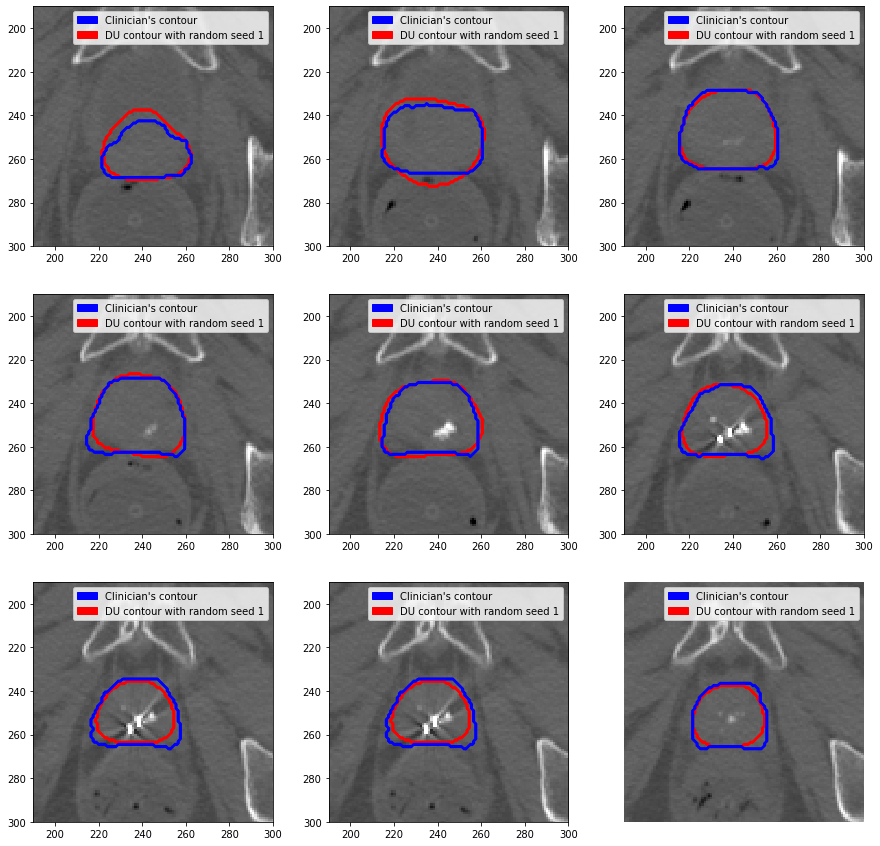

In [133]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image1[..., i  + 17 ], cmap="gray", vmin=500, vmax=2000)
    plt.contour(assd_contour[...,i + 17 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(label1[..., i + 17 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(190, 300)
    plt.ylim(300, 190)
    blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    plt.legend(handles=[ blue_patch, red_patch])
    
plt.axis('off')

## Plot of clinician's contour vs. DU contour with seed 2

(190.0, 300.0, 300.0, 190.0)

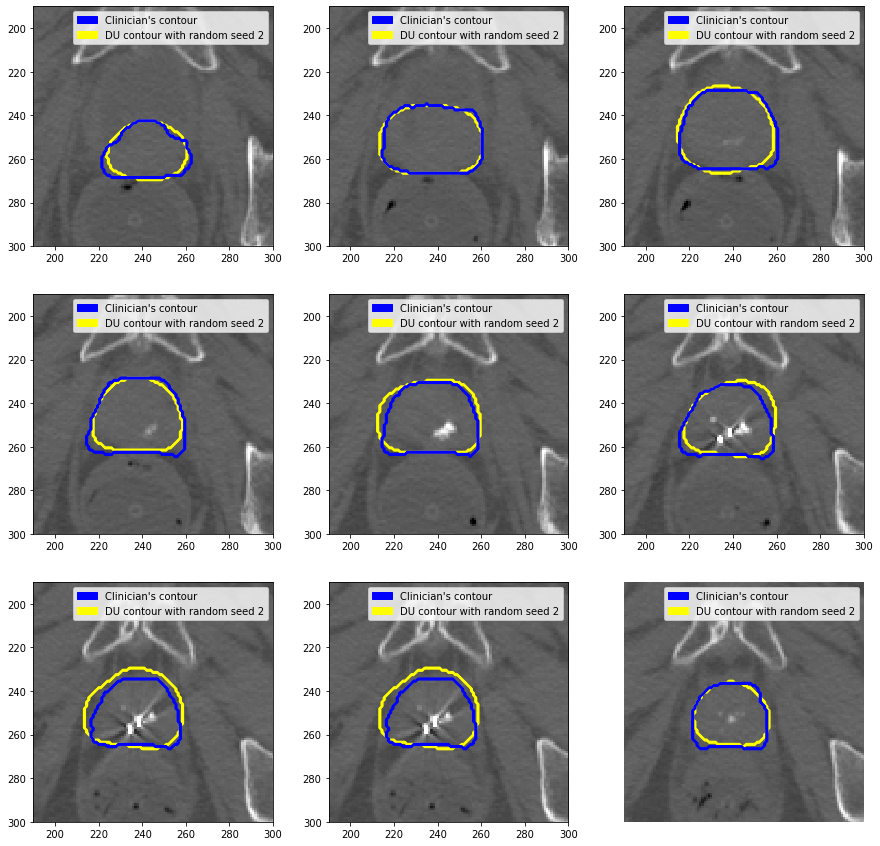

In [110]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image1[..., i  + 17 ], cmap="gray", vmin=500, vmax=2000)
    plt.contour(assd_contour_2[...,i + 17 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="yellow")
    plt.contour(label1[..., i + 17 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(190, 300)
    plt.ylim(300, 190)
    blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    yellow_patch = mpatches.Patch(color='yellow', label='DU contour with random seed 2')
    plt.legend(handles=[ blue_patch, yellow_patch])
    
plt.axis('off')

*-> Based on the above plots, we can see that the algorithm works fine on different slices of the same subject.*

# 5. 3D Plotting

In [65]:
from skimage import measure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def make_mesh(image, threshold=-300, step_size=1):

    p = image.transpose(1,0,2)
    
    verts, faces, norm, val = measure.marching_cubes_lewiner(p, threshold, step_size=step_size, allow_degenerate=True) 
    return verts, faces

def plotly_3d(verts, faces):
    x,y,z = zip(*verts) 
    
    
    # Make the colormap single color since the axes are positional not intensity. 
#    colormap=['rgb(255,105,180)','rgb(255,255,51)','rgb(0,191,255)']
    colormap=['rgb(236, 236, 212)','rgb(236, 236, 212)']
    
    fig = FF.create_trisurf(x=x,
                        y=y, 
                        z=z, 
                        plot_edges=False,
                        colormap=colormap,
                        simplices=faces,
                        backgroundcolor='rgb(64, 64, 64)',
                        title="Interactive Visualization")
    iplot(fig)

def plt_3d(verts_1, faces_1, verts_2, faces_2, color, title):
    x,y,z = zip(*verts_1) 
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    #mesh_1 = Poly3DCollection(verts_1[faces_1], linewidths=0.05, alpha=0.2)
    mesh_2 = Poly3DCollection(verts_2[faces_2], linewidths=0.05, alpha=0.3)
    face_color = [1, 1, 0.9]
    #mesh_1.set_facecolor("w")
    #ax.add_collection3d(mesh_1, zdir="z")
    mesh_2.set_facecolor(color)
    ax.add_collection3d(mesh_2, zdir="z")
    ax.set_title(title)
    ax.set_xlim(190, 300)
    ax.set_ylim(190, 300)
    ax.set_zlim(0, 40)
    ax.set_facecolor((0.7, 0.7, 0.7))
    plt.show()

In [66]:
v_1, f_1 = make_mesh(image1[..., 17:29], 350)
v_2, f_2 = make_mesh(label1[..., 17:29], 0)
v_3, f_3 = make_mesh(assd_contour[..., 17:29], 0)

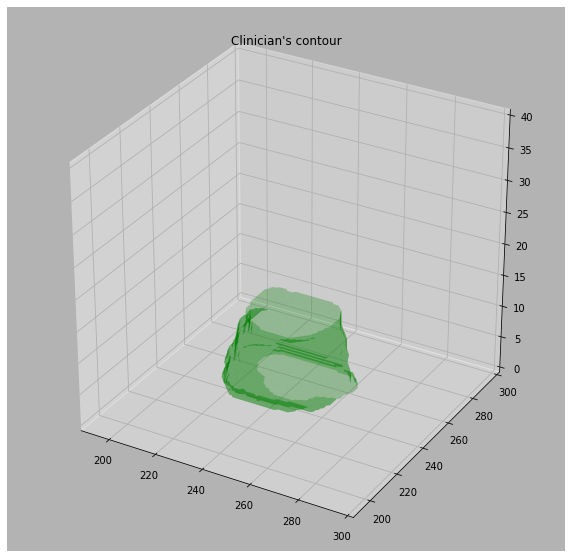

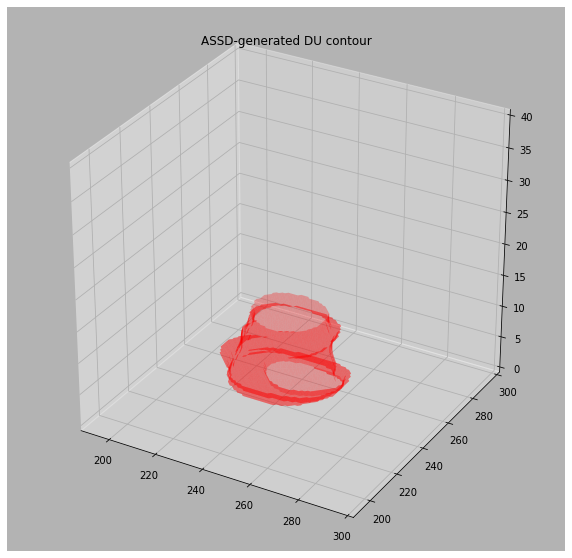

In [67]:
plt_3d(v_1, f_1, v_2, f_2, "g", "Clinician's contour")
plt_3d(v_1, f_1, v_3, f_3, "r", "ASSD-generated DU contour")

# 6. Limitations and Future Works

1. The current algorithm is implemented on 2D images. Although, we can appy this countouring algorithm on multiple 2D images to create the 3D affect, we may work on desgining an algorithm specifically for 3D images in the future. 

2. In our implementation, we only focus on the voxel on the surface of ROI since our goal is to create DU contouring based on original contour. Interior voxel will be taken into consideration in future implementation for the purpose of radiation treatment planning if this works continue into that area. 

3. The performance of this contouring algorithm needs to be validated and compared against other existing solutions. We may need to do some research on the existing solutions of DU contouring. 
